#**SOC Project - Enhance Low Resolution Image using GANs**

##Week 1


*   *Brushing up Python Programming and OOPs.*
*   *Get Acquainted with neural networks and the math behind it.*

---

### Neural Networks

![Neural Networks](https://i.pinimg.com/564x/d9/e5/50/d9e550b714d4d7c262c8ff236959472d.jpg)

We have the following components in a machine learning setup:


1.   Training Set
2.   Model
3.   Parameters
4.   Learning algorithm
5.   Cost/error function



#### Activation function

*   Hidden layers: ReLU function
*   Output layer:
 *  Binary classification: Sigmoid function
 *  Multiclass classification: Softmax function

#### Cost function

*   Linear Regression problem: MSE Loss
*   Binary Classification: Binary Cross-entropy Loss
*   Multiclass Classification: Sparse Categorical Cross-entropy Loss



#### Learning Algorithm

*  SGD: Stochastic Gradient Descent
*  Adam algorithm

## Week2

*   *Get acquainted with PyTorch.*
*   *Develop an understanding of Convolutional Neural Networks (CNNs).*

---

### PyTorch

#### Basics

In [ ]:
import torch
x = torch.empty(2,3) #creating an empty tensor
print(x)
print(x.size())
x1 = torch.rand(2,2)
print(x1)
x2 = torch.zeros(1,2)
print(x2)
x = torch.tensor([2, 10])
print(x)
x3 = x1+x2  # can also use x3 = torch.add(x1,x2)
            # similarly, torch.sub(x,y), torch.mul(x,y), torch.div(x,y)
print(x3)

# we can do slicing too, similar to numpy arrays
# eg: x[1, :] returns the 2nd row

# reshaping: y = x.view(...number of values...)

tensor([[       nan, 4.5668e-41, 4.9774e-35],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])
tensor([[0.0306, 0.1141],
        [0.0725, 0.9424]])
tensor([[0., 0.]])
torch.Size([2, 3])
tensor([ 2, 10])
tensor([[0.0306, 0.1141],
        [0.0725, 0.9424]])


In [ ]:
import torch
import numpy as np

# b = a.numpy() >>> converts tensor to numpy array
# both point to same memory location

# b = torch.from_numpy(a) >>> converts numpy array to tensor

#### Gradients

In [ ]:
import torch

x = torch.rand(3, requires_grad=True)
print(x)

y = x+3
print(y)

z = y*y*3
print(z)

z = z.mean() #now z has only 1 value (hence scalar)
print(z)

z.backward() #scalar, thus no argument
print(x.grad)

tensor([0.0962, 0.9470, 0.5200], requires_grad=True)
tensor([3.0962, 3.9470, 3.5200], grad_fn=<AddBackward0>)
tensor([28.7602, 46.7356, 37.1718], grad_fn=<MulBackward0>)
tensor(37.5559, grad_fn=<MeanBackward0>)
tensor([6.1925, 7.8939, 7.0401])


In [ ]:
# autograd

import torch
import numpy as np

weights = torch.ones(4, requires_grad=True)


In [ ]:
# backpropagation
## here's an example. x = 1 and w = 1 and y =2

import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad = True)

# forward pass
## also find loss

y_hat = torch.mul(x,w)
loss = (y_hat - y)**2
print(loss)

# backward pass
## also find grad w

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


#### Gradient descent with backpropagation and autograd

In [ ]:
# using numpy

import numpy as np

## f = x*z
## here, w = 2

X = np.array([1.0, 2.0, 3.0, 4.0])
Y = np.array([2.0, 4.0, 6.0, 8.0])    #actual output

w = 0.0   #initially set to 0

### model prediction

def forward(x):
  return x*w

### loss (MSE)

def loss(y , y_hat):
  return ((y_hat-y)**2).mean()

### gradient:
    # J = 1/N (wx-y)^2
    # dJ/dw = 1/N (wx-y)(2x)

def gradient(x, y, y_hat):
  return np.dot((y_hat-y),(2*x)).mean()

#--------------------------------------
print(f'Prediction before training: f(5) = {forward(5):.3f}')

### training

learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  y_hat = forward(X)
  l = loss(Y, y_hat)
  dw = gradient(X,Y,y_hat)
  w -= learning_rate*dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.5f}')

print(f'Predction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000
epoch 2: w = 1.680, loss = 4.80000
epoch 3: w = 1.872, loss = 0.76800
epoch 4: w = 1.949, loss = 0.12288
epoch 5: w = 1.980, loss = 0.01966
epoch 6: w = 1.992, loss = 0.00315
epoch 7: w = 1.997, loss = 0.00050
epoch 8: w = 1.999, loss = 0.00008
epoch 9: w = 1.999, loss = 0.00001
epoch 10: w = 2.000, loss = 0.00000
Predction after training: f(5) = 9.999


In [ ]:
# using torch

import torch

## f = x*z
## here, w = 2

X = torch.tensor([1.0, 2.0, 3.0, 4.0])
Y = torch.tensor([2.0, 4.0, 6.0, 8.0])    #actual output

w = torch.tensor(0.0, requires_grad = True)   #initially set to 0

### model prediction

def forward(x):
  return x*w

### loss (MSE)

def loss(y , y_hat):
  return ((y_hat-y)**2).mean()

#--------------------------------------
print(f'Prediction before training: f(5) = {forward(5):.3f}')

### training

learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
  y_hat = forward(X)
  l = loss(Y, y_hat)
  l.backward()
  with torch.no_grad():
    w -= learning_rate*w.grad
  w.grad.zero_()

  if epoch % 5 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.5f}')

print(f'Predction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000
epoch 6: w = 1.246, loss = 5.90623
epoch 11: w = 1.665, loss = 1.16279
epoch 16: w = 1.851, loss = 0.22892
epoch 21: w = 1.934, loss = 0.04507
epoch 26: w = 1.971, loss = 0.00887
epoch 31: w = 1.987, loss = 0.00175
epoch 36: w = 1.994, loss = 0.00034
epoch 41: w = 1.997, loss = 0.00007
epoch 46: w = 1.999, loss = 0.00001
Predction after training: f(5) = 9.997


Training pipeline:

1.   Design the model
2.   Loss optimiser construction
3.   training loop:
*    compute predction (forward pass)
*    gradients (backward pass) 
*    update weights

In [ ]:
# using the nn module

import torch
import torch.nn as nn

## f = x*z
## here, w = 2

X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])    #actual output

X_test = torch.tensor([5.0])

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

#--------------------------------------
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

### training

learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  y_hat = model(X)
  l = loss(Y, y_hat)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 5 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.5f}')

print(f'Predction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 2.710
epoch 1: w = 0.578, loss = 13.73080
epoch 6: w = 1.185, loss = 2.41577
epoch 11: w = 1.432, loss = 0.58964
epoch 16: w = 1.534, loss = 0.28997
epoch 21: w = 1.579, loss = 0.23600
epoch 26: w = 1.600, loss = 0.22173
epoch 31: w = 1.612, loss = 0.21400
epoch 36: w = 1.620, loss = 0.20749
epoch 41: w = 1.627, loss = 0.20133
epoch 46: w = 1.633, loss = 0.19538
Predction after training: f(5) = 9.253


#### Linear regression

![Linear Regression](https://i.pinimg.com/564x/70/78/af/7078aff46eebb885ef6ad1f5ff7955a8.jpg)

1. **Cost function**: MSE *(Mean Squared Error)* Loss

2. **Optimizer**: SGD *(Stochastic Gradient Descent)* Algorithm

epoch: 10, loss = 4411.98145
epoch: 20, loss = 3293.15723
epoch: 30, loss = 2482.98706
epoch: 40, loss = 1895.73047
epoch: 50, loss = 1469.65613
epoch: 60, loss = 1160.25818
epoch: 70, loss = 935.40784
epoch: 80, loss = 771.88141
epoch: 90, loss = 652.87421
epoch: 100, loss = 566.21252


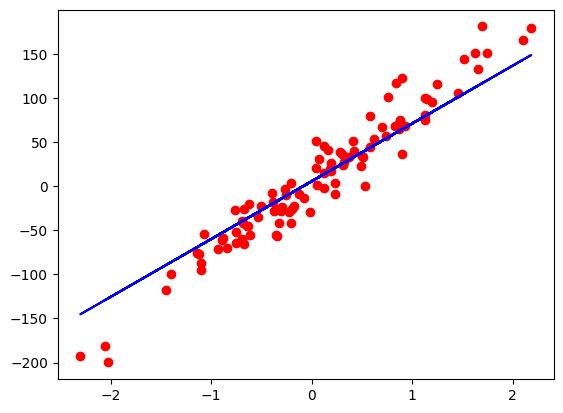

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

y = y.view(y.shape[0], 1) #reshaping the tensor from row to column vector

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss & optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # SDG is Stochastic Gradient Descent

# training loop
n_epochs = 100
for epoch in range(n_epochs):

  ### forward pass
  y_hat = model(X)
  loss = criterion(y_hat, y)

  ### backward pass
  loss.backward()

  ### update
  optimizer.step()
  optimizer.zero_grad() #emptying the gradients for next step

  if(epoch+1)% 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.5f}')
  
# plot
predicted = model(X).detach().numpy()
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, predicted, 'b')
plt.show()

#### Logistic Regression

![Logistic Regression](https://miro.medium.com/v2/resize:fit:460/1*klFuUpBGVAjTfpTak2HhUA.png)

1. **Cost function**: BCE *(Binary Cross Entropy)* Loss

2. **Optimizer**: SGD *(Stochastic Gradient Descent)* Algorithm

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# loss & optimizer
learning_rate = 0.01
criterion = nn.BCELoss() # Binary CrossEntropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # SGD is Stochastic Gradient Descent

# training loop
n_epochs = 100
for epoch in range(n_epochs):

  ### forward pass
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  ### backward pass
  loss.backward()

  ### update
  optimizer.step()
  optimizer.zero_grad() #emptying the gradients for next step

  if (epoch+1)% 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

# Evaluation
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round() # converting to a class label (1 if >= 0.5)
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5503
epoch: 20, loss = 0.4635
epoch: 30, loss = 0.4049
epoch: 40, loss = 0.3626
epoch: 50, loss = 0.3306
epoch: 60, loss = 0.3054
epoch: 70, loss = 0.2849
epoch: 80, loss = 0.2680
epoch: 90, loss = 0.2537
epoch: 100, loss = 0.2414
accuracy = 0.8947


#### Dataset and Dataloader

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

  def __init__(self):
    xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]])
    self.n_samples = xy.shape[0]

  def __getitem(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=24)

# training loop
n_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

# for epoch in range(n_epochs):
#   for i, (inputs, labels) in enumerate(dataloader):
#     if(i+1) % 5 == 0:
#       print(f'epoch {epoch+1}/{n_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

#### Dataset Transforms

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np


class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note :  we don't convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.n_samples

## Custom Transforms

# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


#### Softmax function and Cross-Entropy Loss

In [ ]:
import torch
import torch.nn as nn
import numpy as np


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)


def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [ ]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')



PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)


#### Activation functions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# output = w*x + b
# output = activation_function(output)

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


#### Feed-forward Neural Network

100%|██████████| 9912422/9912422 [00:00<00:00, 138004704.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 82686480.43it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40215685.27it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3240988.22it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



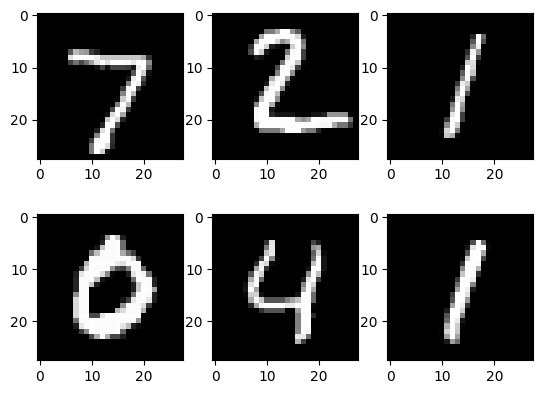

Epoch [1/2], Step [100/600], Loss: 0.2471
Epoch [1/2], Step [200/600], Loss: 0.4886
Epoch [1/2], Step [300/600], Loss: 0.1942
Epoch [1/2], Step [400/600], Loss: 0.2020
Epoch [1/2], Step [500/600], Loss: 0.2586
Epoch [1/2], Step [600/600], Loss: 0.2590
Epoch [2/2], Step [100/600], Loss: 0.0722
Epoch [2/2], Step [200/600], Loss: 0.2350
Epoch [2/2], Step [300/600], Loss: 0.1187
Epoch [2/2], Step [400/600], Loss: 0.0941
Epoch [2/2], Step [500/600], Loss: 0.0902
Epoch [2/2], Step [600/600], Loss: 0.0969
Accuracy of the network on the 10000 test images: 97.13 %


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

#### CNN

![CNN](https://i.pinimg.com/564x/4c/9d/58/4c9d585a5f83eb2058daabad03ff9e48.jpg)

100%|██████████| 170498071/170498071 [00:03<00:00, 43340128.27it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


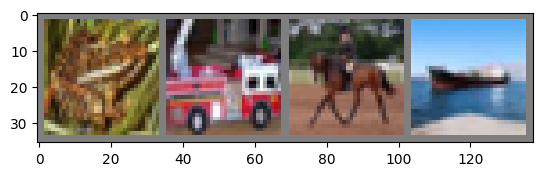

Epoch [1/5], Step [2000/12500], Loss: 2.2955
Epoch [1/5], Step [4000/12500], Loss: 2.3153
Epoch [1/5], Step [6000/12500], Loss: 2.2628
Epoch [1/5], Step [8000/12500], Loss: 2.3016
Epoch [1/5], Step [10000/12500], Loss: 2.3926
Epoch [1/5], Step [12000/12500], Loss: 2.2308
Epoch [2/5], Step [2000/12500], Loss: 1.9068
Epoch [2/5], Step [4000/12500], Loss: 2.2991
Epoch [2/5], Step [6000/12500], Loss: 1.6619
Epoch [2/5], Step [8000/12500], Loss: 2.1881
Epoch [2/5], Step [10000/12500], Loss: 1.6661
Epoch [2/5], Step [12000/12500], Loss: 1.3860


KeyboardInterrupt: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


### Week2 Assignment

*Implementing a basic classification model utilizing Logistic Regression on the iris dataset in PyTorch.*


1. NumPy Implementation:

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Importing the dataset
dataset = pd.read_csv('Iris.csv')
dataset.describe()

# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train_encoded)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2.4        | 14         | 0.0        | 0.01          | 0.0       
1.0        | 9          | 0.01       | 0.01          | 0.01      
0.2        | 1          | 0.05       | 0.43          | 0.04      
1.8        | 17         | 0.0        | 0.0           | 0.0       
0.2        | 1          | 0.14       | 0.6           | 0.11      
2.5        | 14         | 0.0        | 0.0           | 0.0       
0.3        | 1          | 0.1        | 0.65          | 0.08      
1.5        | 10         | 0.0        | 0.01          | 0.0       
1.4        | 11         | 0.0        | 0.01          | 0.0       
1.3        | 9          | 0.02       | 0.04          | 0.02      
1.4        | 15         | 0.0        | 0.0           | 0.0       
1.5        | 10         | 0.02       | 0.03          | 0.02      
1.2        | 9          | 0.01       | 0.02          | 0.01      
1.5     

2. PyTorch implementation

In [ ]:
# importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

# Set the hyperparameters
input_size = X.shape[1]
num_classes = len(iris.target_names)
learning_rate = 0.001
num_epochs = 1000

# Initialize the model
model = LogisticRegression(input_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)

    # Predict probabilities
    softmax = nn.Softmax(dim=1)
    probs = softmax(outputs)
    probs = probs.cpu().detach().numpy()
    probs = np.round(probs, 3)

    # Print results
    res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)")
    res += "\n" + "-" * 65 + "\n"
    for yt, yp, p in zip(y_test, predicted, probs):
        target_class = iris.target_names[yt]
        predicted_class = iris.target_names[yp]
        res += "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}\n".format(target_class, predicted_class, p[0], p[1], p[2])
    res += "-" * 65 + "\n"
    print(res)

    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [100/1000], Loss: 0.6912
Epoch [200/1000], Loss: 0.6711
Epoch [300/1000], Loss: 0.6533
Epoch [400/1000], Loss: 0.6374
Epoch [500/1000], Loss: 0.6230
Epoch [600/1000], Loss: 0.6100
Epoch [700/1000], Loss: 0.5981
Epoch [800/1000], Loss: 0.5872
Epoch [900/1000], Loss: 0.5772
Epoch [1000/1000], Loss: 0.5679
y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
versicolor | versicolor | 0.24400000274181366 | 0.3790000081062317 | 0.37700000405311584
setosa     | setosa     | 0.8309999704360962 | 0.05999999865889549 | 0.10899999737739563
virginica  | virginica  | 0.024000000208616257 | 0.23899999260902405 | 0.7369999885559082
versicolor | virginica  | 0.21299999952316284 | 0.34299999475479126 | 0.4440000057220459
versicolor | virginica  | 0.18000000715255737 | 0.31700000166893005 | 0.503000020980835
setosa     | setosa     | 0.8130000233650208 | 0.09300000220537186 | 0.0949999988079071
versicolor | setosa   

## Week3

* *Get familiar with the nn.Module of PyTorch*
* *Implementation of a CNN based Image Classifier using PyTorch*

---

### Implementation of a CNN based Image Classifier using PyTorch

####Step 1: Downloading data and printing some sample images from the training set.

100%|██████████| 170498071/170498071 [00:02<00:00, 79775419.49it/s]


Extracting ./CIFAR10/train/cifar-10-python.tar.gz to ./CIFAR10/train


100%|██████████| 170498071/170498071 [00:01<00:00, 90109935.87it/s]


Extracting ./CIFAR10/test/cifar-10-python.tar.gz to ./CIFAR10/test


(-0.5, 165.5, 165.5, -0.5)

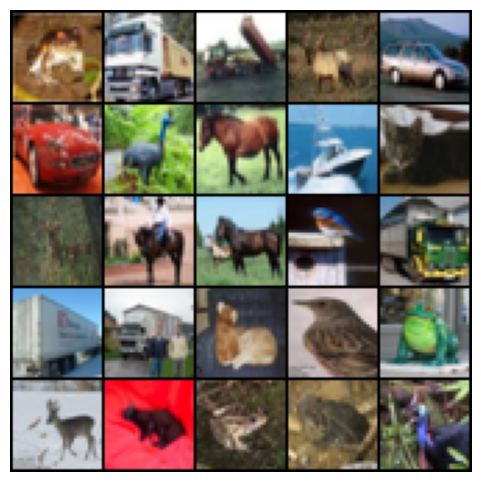

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
  
# The below two lines are optional and are just there to avoid any SSL
# related errors while downloading the CIFAR-10 dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
  
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6
  
#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])
  
#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(root="./CIFAR10/train", train=True,transform=normalize_transform,download=True)
test_dataset = torchvision.datasets.CIFAR10(root="./CIFAR10/test", train=False,transform=normalize_transform,download=True)
    
#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
  
#Plotting 25 images from the 1st batch 
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

#### Step-2: Plotting class distribution of the dataset

Text(0, 0.5, 'Number of training instances')

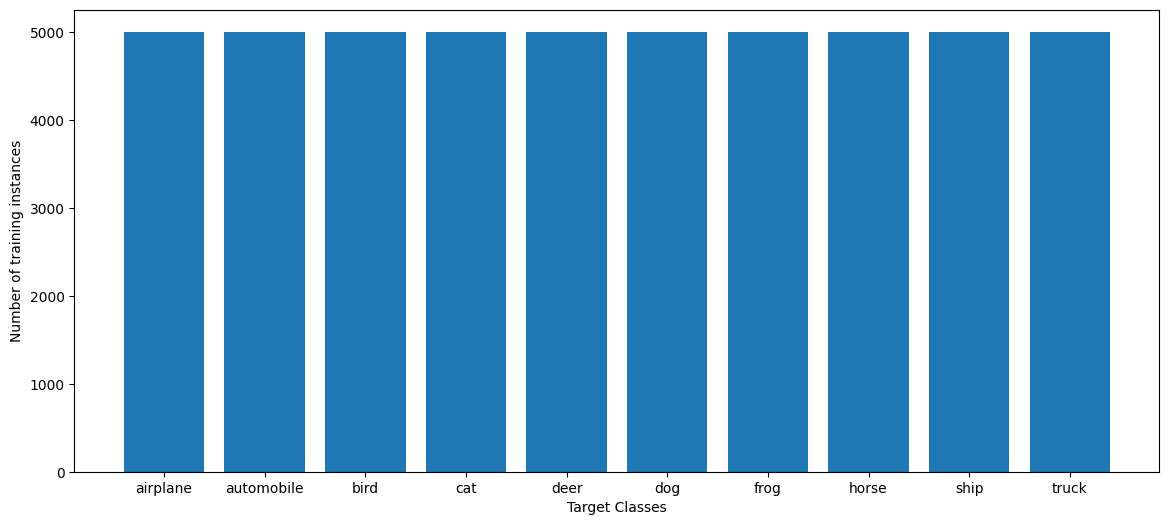

In [ ]:
#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

#### Step-3: Implementing the CNN architecture

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), 
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=2),
  
            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=2),
              
            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=2),
  
            torch.nn.Flatten(),
            torch.nn.Linear(64*4*4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )
  
    def forward(self, x):
        return self.model(x)

#### Step-4: Defining the training parameters and beginning the training process

Epoch 1/10: Training loss = 1.8108665016301149
Epoch 2/10: Training loss = 1.5313937804278206
Epoch 3/10: Training loss = 1.4403170481362306
Epoch 4/10: Training loss = 1.377835496307334
Epoch 5/10: Training loss = 1.3430192290669511
Epoch 6/10: Training loss = 1.318666197759721
Epoch 7/10: Training loss = 1.291983273937879
Epoch 8/10: Training loss = 1.2765761208351312
Epoch 9/10: Training loss = 1.2698839021765667
Epoch 10/10: Training loss = 1.2600222015015


Text(0, 0.5, 'Training loss')

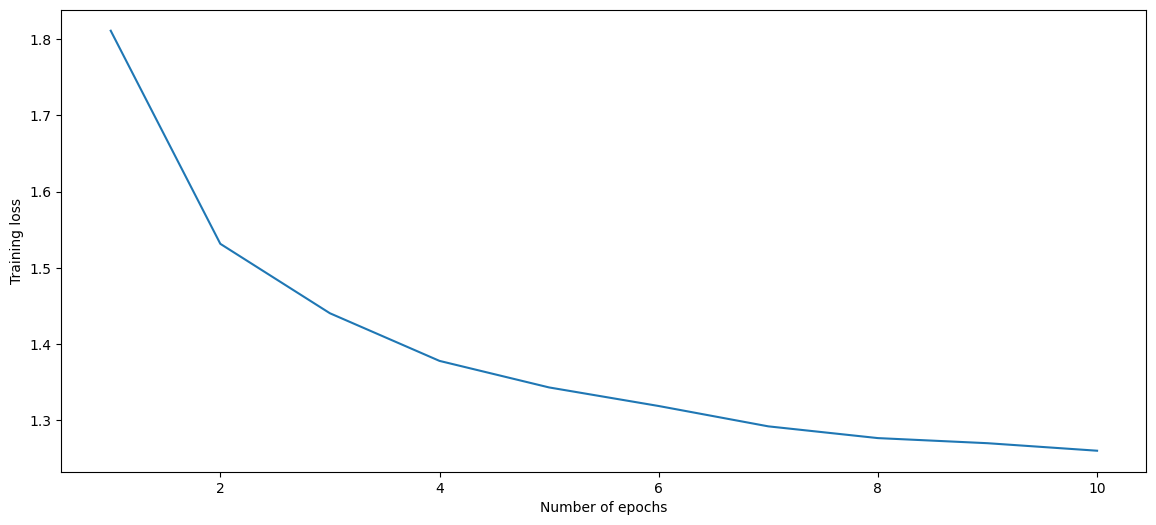

In [ ]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 10
learning_rate = 0.01
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  
#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
      
    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):
          
        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)
  
        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)
  
        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")   
      
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

#### Step-5: Calculating the model’s accuracy on the test set

In [ ]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 55.73 %


#### Step 6: Generating predictions for sample images in the test set

(-0.5, 165.5, 33.5, -0.5)

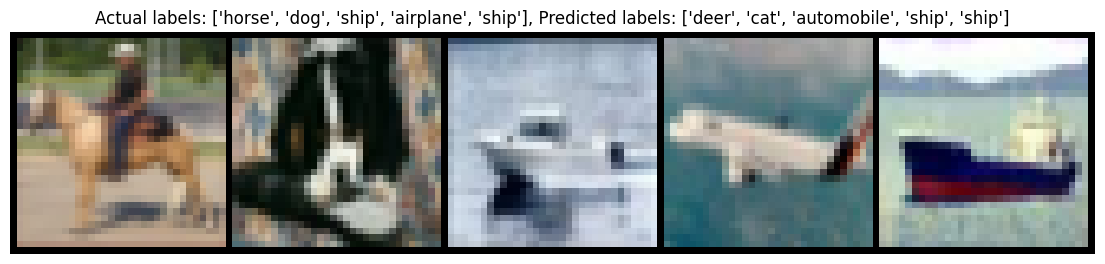

In [ ]:
#Generating predictions for 'num_images' amount of images from the last batch of test set
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)] 
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)] 
  
#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"
  
#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")

### Week3 Assignment

*Applying a classification CNN using PyTorch to recognize digits on the MNIST dataset.*

#### Importing Libraries

In [ ]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim

#### Dataset and dataloader step

In [ ]:
# MNIST dataset 
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor())

train_loader = DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1)
test_loader = DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)

#### Defining the CNN model

In [ ]:
class ConvNet(nn.Module):

    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, 1, 2)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)                   
        self.pool = nn.MaxPool2d(2)
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)      
        x = self.out(x)
        return x

model = ConvNet().to(device)

#### Loss and Optimization functions

In [ ]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Using the SGD optimiser instead of the Adam optimizer

#### Training the model

In [ ]:
num_epochs = 5

n_total_steps = len(train_loader)    
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):   
    # gives batch data, normalize x when iterate train_loader
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()   # clear gradients for this training step          
    loss.backward()         # backpropagation, compute gradients             
    optimizer.step()        # apply gradients               

    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.5184
Epoch [1/5], Step [200/600], Loss: 0.3074
Epoch [1/5], Step [300/600], Loss: 0.4549
Epoch [1/5], Step [400/600], Loss: 0.4719
Epoch [1/5], Step [500/600], Loss: 0.3099
Epoch [1/5], Step [600/600], Loss: 0.1715
Epoch [2/5], Step [100/600], Loss: 0.1930
Epoch [2/5], Step [200/600], Loss: 0.2235
Epoch [2/5], Step [300/600], Loss: 0.1206
Epoch [2/5], Step [400/600], Loss: 0.2263
Epoch [2/5], Step [500/600], Loss: 0.1798
Epoch [2/5], Step [600/600], Loss: 0.2581
Epoch [3/5], Step [100/600], Loss: 0.2089
Epoch [3/5], Step [200/600], Loss: 0.1901
Epoch [3/5], Step [300/600], Loss: 0.1420
Epoch [3/5], Step [400/600], Loss: 0.0823
Epoch [3/5], Step [500/600], Loss: 0.2066
Epoch [3/5], Step [600/600], Loss: 0.1519
Epoch [4/5], Step [100/600], Loss: 0.1918
Epoch [4/5], Step [200/600], Loss: 0.2672
Epoch [4/5], Step [300/600], Loss: 0.1570
Epoch [4/5], Step [400/600], Loss: 0.1064
Epoch [4/5], Step [500/600], Loss: 0.2220
Epoch [4/5], Step [600/600], Loss:

#### Evaluating the model

In [ ]:
model.eval()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    test_output = model(images)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    accuracy = (pred_y == labels).sum().item() / float(labels.size(0))

print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

Test Accuracy of the model on the 10000 test images: 0.96


#### Printing predictions from test data

In [ ]:
sample = next(iter(test_loader))
imgs, lbls = sample
actual_number = lbls[:10].numpy()

test_output = model(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [9 9 1 0 3 3 7 6 2 1]
Actual number: [9 9 1 0 3 3 7 6 2 1]


## Week4

* *Introduction to GANs*
* *PyTorch GANs*

---

GANs (Generative Adversarial Networks) consist of a generator and a discriminator.


*  **Generator**
 * Generates synthetic data that resembles the training dataset
 * Learns to produce more realistic samples over time
 * The generator loss quantifies how successful the generator is in fooling the discriminator

*  **Discriminator**
  * Distinguishes between real and fake data
  * Learns to better classify real and fake samples
  * The discriminator loss measures how well the discriminator can distinguish between real and fake samples
